# Exploratoration of the Spotify API
### Creation of the Client

In [2]:
from spotipy.oauth2 import SpotifyOAuth
from spotipy import Spotify
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv


In [3]:

#For getting the environment variables
load_dotenv()
song_link = "https://open.spotify.com/track/2NZUXUA8gGmXXw5MayF63k?si=bdfd71ed4c504192"

SPOTIPY_CLIENT_ID = os.getenv('SPOTIPY_CLIENT_ID')
SPOTIPY_CLIENT_SECRET =os.getenv('SPOTIPY_CLIENT_SECRET')
SPOTIPY_REDIRECT_URI = os.getenv('SPOTIPY_REDIRECT_URI')
scope = "user-library-read"

sp = Spotify(auth_manager=SpotifyOAuth(scope=scope,
                                               client_id=SPOTIPY_CLIENT_ID,
                                               client_secret=SPOTIPY_CLIENT_SECRET))

In [4]:
results_dict = sp.playlist_tracks("https://open.spotify.com/playlist/2RuXhLrgWt5odD2RUtYItC?si=108b9c68f7204c08")
tracks_data = []
name_tracks = []
for result in results_dict["items"]:
    track_data = sp.audio_features(result["track"]["id"])[0]  # Get audio features for each track
    name_tracks.append(result["track"]["name"])
    tracks_data.append(track_data)

# Create a DataFrame with keys as indices
df = pd.DataFrame(tracks_data)
df = df.assign(name=name_tracks)


In [28]:
results_dict = sp.playlist_tracks("https://open.spotify.com/playlist/2RuXhLrgWt5odD2RUtYItC?si=108b9c68f7204c08")
tracks_data = []
name_tracks = []
album_names = []  # New list to store album names

for result in results_dict["items"]:
    track_data = sp.audio_features(result["track"]["id"])[0]  # Get audio features

    # Get track information
    track = sp.track(result["track"]["id"])
    album_name = track["album"]["name"]

    name_tracks.append(result["track"]["name"])
    tracks_data.append(track_data)
    album_names.append(album_name)

# Create a DataFrame with keys as indices and album information
df = pd.DataFrame(tracks_data)
df = df.assign(name=name_tracks, album=album_names)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name,album
0,0.293,0.462,5,-11.412,0,0.0453,0.69900,0.044400,0.0954,0.0623,124.004,audio_features,5AiNZnMDCWwujIENPj9PV9,spotify:track:5AiNZnMDCWwujIENPj9PV9,https://api.spotify.com/v1/tracks/5AiNZnMDCWwu...,https://api.spotify.com/v1/audio-analysis/5AiN...,251427,5,Everything In Its Right Place,Kid A
1,0.630,0.429,5,-15.540,1,0.0356,0.26100,0.850000,0.3090,0.1680,112.930,audio_features,4x7XJOE2ml2P3o3i77466j,spotify:track:4x7XJOE2ml2P3o3i77466j,https://api.spotify.com/v1/tracks/4x7XJOE2ml2P...,https://api.spotify.com/v1/audio-analysis/4x7X...,284507,4,Kid A,Kid A
2,0.384,0.717,6,-8.868,1,0.0339,0.00281,0.569000,0.1870,0.4200,105.852,audio_features,11qDTSr3Dj4TkPnBcIOqEJ,spotify:track:11qDTSr3Dj4TkPnBcIOqEJ,https://api.spotify.com/v1/tracks/11qDTSr3Dj4T...,https://api.spotify.com/v1/audio-analysis/11qD...,192667,4,Vegetable,Pablo Honey
3,0.541,0.847,11,-6.520,1,0.0297,0.30300,0.271000,0.1090,0.6200,148.937,audio_features,3pcCifdPTc2BbqmWpEhtUd,spotify:track:3pcCifdPTc2BbqmWpEhtUd,https://api.spotify.com/v1/tracks/3pcCifdPTc2B...,https://api.spotify.com/v1/audio-analysis/3pcC...,220609,4,Burn the Witch,A Moon Shaped Pool
4,0.515,0.430,7,-9.935,1,0.0369,0.01020,0.000141,0.1290,0.1040,91.841,audio_features,6b2oQwSGFkzsMtQruIWm2p,spotify:track:6b2oQwSGFkzsMtQruIWm2p,https://api.spotify.com/v1/tracks/6b2oQwSGFkzs...,https://api.spotify.com/v1/audio-analysis/6b2o...,238640,4,Creep,Pablo Honey


/var/folders/jd/3f08_zdj5kj5ql0b3h3mj8g40000gn/T/ipykernel_32808/1217488536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(y=audio_feature.lower(), x='album', data=df_grouped, jitter=True, size=5, alpha=0.7, palette='Set1')


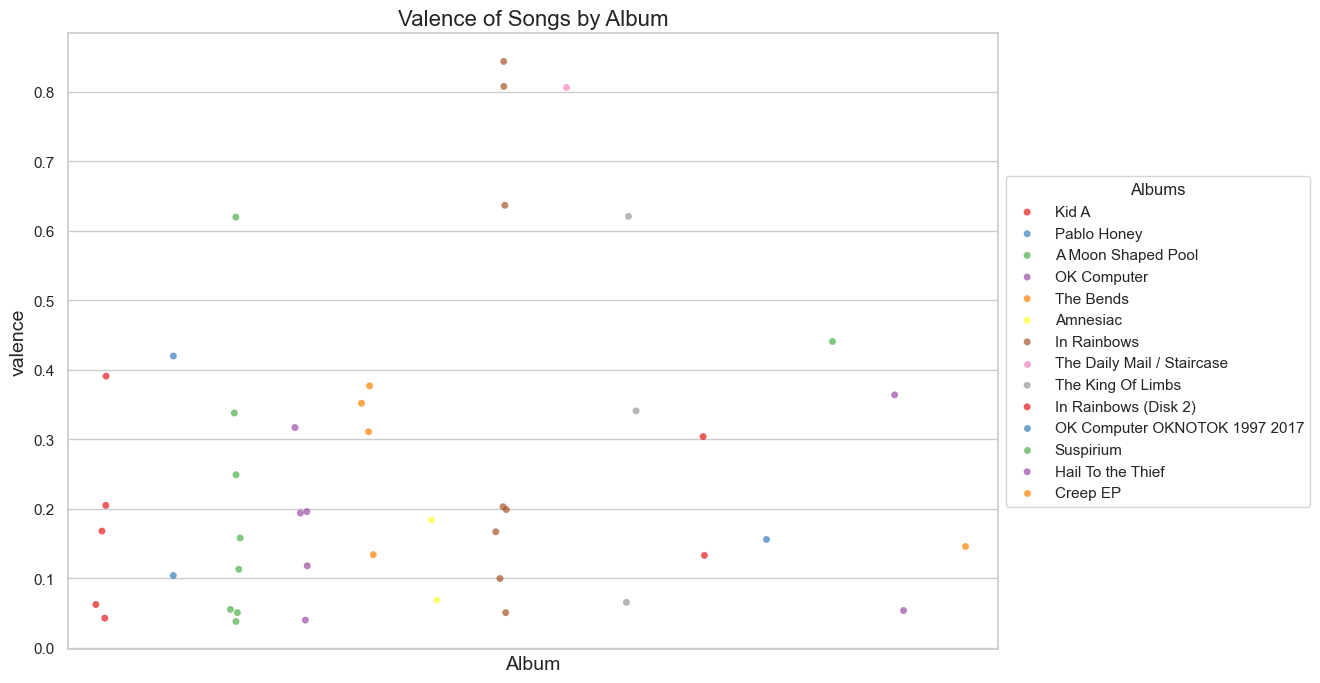

In [29]:

def create_plot_by_album(df:pd.DataFrame,audio_feature:str)->None:
    df_grouped = df[[f"{audio_feature}", 'album']]
    # Create dot plot# Create the figure and axis
    plt.figure(figsize=(12, 8))
    ax = sns.stripplot(y=audio_feature.lower(), x='album', data=df_grouped, jitter=True, size=5, alpha=0.7, palette='Set1')

    # Customize x-tick labels (hide them) and use shorter labels or none
    ax.set_xticks([])

    # Create a legend
    handles, labels = ax.get_legend_handles_labels()
    album_labels = df['album'].unique()
    legend = plt.legend(title='Albums', labels=album_labels, loc='center left', bbox_to_anchor=(1, 0.5))

    # Customize plot
    plt.title(f'{audio_feature.capitalize()} of Songs by Album', fontsize=16)
    plt.ylabel(f'{audio_feature}', fontsize=14)
    plt.xlabel('Album', fontsize=14)

    # Show plot
    plt.show()
create_plot_by_album(df,"valence")